# Analyse Rotation Spectra - Plots

## Load Libraries

In [1]:
from andbro__querrySeismoData import __querrySeismoData
from obspy import UTCDateTime
from scipy.signal import welch
from numpy import log10, zeros, pi, append, linspace, mean, median, array, where, transpose, shape, histogram, arange
from numpy import logspace, linspace, log, log10, isinf, ones, nan, count_nonzero, sqrt, isnan, interp, load
from pandas import DataFrame, concat, Series, date_range, read_csv, read_pickle
from tqdm import tqdm_notebook
from pathlib import Path
from scipy.stats import median_absolute_deviation as mad

import pickle
import matplotlib.pyplot as plt
import os

In [2]:
host = os.uname()[1]
if host == "kilauea":
    homepath = "/import/kilauea-data/"
    out_figs = "/home/brotzer/Documents/ROMY/LowNoiseModel/figures/local_comparison/"
elif host == "lighthouse":
    homepath = "/home/andbro/kilauea-data/"
    out_figs = "/home/andbro/Documents/ROMY/LowNoiseModel/figures/local_comparison/"

In [3]:
# !ls f"/import/kilauea-data/ROMY/RotationSpectra/data"

## Configurations

In [4]:
config = {}

config['frequency_limits'] = [0.0001, 1]

## Looping 

In [5]:
def __get_minimal_psd(psds):

    from numpy import nanmin, array, nonzero
    
    min_psd = zeros(psds.shape[1])
    
    for f in range(psds.shape[1]):
        a = psds[:,f]
        min_psd[f] = nanmin(a[nonzero(a)])
    
    return min_psd

In [6]:
def __get_minimum_psd(psds, f_tmp):
    
    from numpy import median
    
    f_before = f_tmp[0]
    f_tmp[0] = 1e-9
    
    for i, psd in enumerate(psds):
        if i == 0: 
            lowest_value = (psds[0]/f_tmp).sum()
#             lowest_value = median(psds[0]/f_tmp)
            idx = 0

        value = (psd/f_tmp).sum() 
#         value = median(psd/f_tmp)
        
        if value < lowest_value and value != 0:
            lowest_value = value
            idx = i

    f_tmp[0] = f_before      
    
    return psds[idx]

In [7]:
def __get_array_from_dataframe(df):
    
    from pandas import to_numeric
    
    ## convert to list
    psds = []
    for col in array(df.columns):
        
        ## turn non-float series to float objects
        df[col] = to_numeric(df[col], errors = 'coerce')

        ## add to psds list
        psds.append(array(df[col]))

    return array(psds)

## Get Data

In [8]:
inname = "run_2019_ROMY-Z_3600"
inpath = f"{homepath}ROMY/RotationSpectra/data/{inname}/"

file = f"{inpath}{inname}_daily_medians.pkl"
print(f" -> loading \n {file} ...")
psds_romy = read_pickle(file)

## load frequencies
ff = pickle.load(open(f"{inpath}{inname}_frequency_axis.pkl", 'rb'))

 -> loading 
 /import/kilauea-data/ROMY/RotationSpectra/data/run_2019_ROMY-Z_3600/run_2019_ROMY-Z_3600_daily_medians.pkl ...


In [9]:
inname = "run_2019_RLAS-Z_3600"
inpath = f"{homepath}ROMY/RotationSpectra/data/{inname}/"

file = f"{inpath}{inname}_daily_medians.pkl"
print(f" -> loading \n {file} ...")
psds_rlas = read_pickle(file)


 -> loading 
 /import/kilauea-data/ROMY/RotationSpectra/data/run_2019_RLAS-Z_3600/run_2019_RLAS-Z_3600_daily_medians.pkl ...


In [10]:
inname = "run_2019_WET-Z_3600"
inpath = f"{homepath}ROMY/RotationSpectra/data/{inname}/"

file = f"{inpath}{inname}_daily_medians.pkl"
print(f" -> loading \n {file} ...")
psds_wet = read_pickle(file)


 -> loading 
 /import/kilauea-data/ROMY/RotationSpectra/data/run_2019_WET-Z_3600/run_2019_WET-Z_3600_daily_medians.pkl ...


In [11]:
inname = "run_2019_FUR-Z_3600"
inpath = f"{homepath}ROMY/RotationSpectra/data/{inname}/"

file = f"{inpath}{inname}_daily_medians.pkl"
print(f" -> loading \n {file} ...")
psds_fur = read_pickle(file)


 -> loading 
 /import/kilauea-data/ROMY/RotationSpectra/data/run_2019_FUR-Z_3600/run_2019_FUR-Z_3600_daily_medians.pkl ...


In [12]:
rlnm = read_csv(f"{homepath}LNM/data/MODELS/"+"rlnm_theory.csv")
rlnm_periods = rlnm['period']
rlnm_psd = rlnm['rlnm_psd_median']

/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


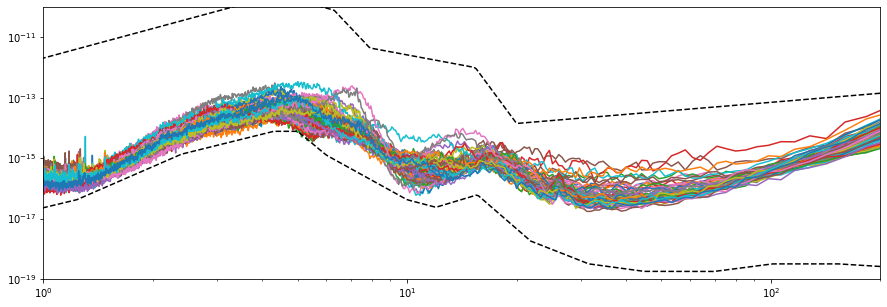

In [13]:
tmp = load(f"{homepath}LNM/data/MODELS/"+"noise_models.npz")
nm_periods, nlnm, nhnm = tmp['model_periods'], tmp['low_noise'], tmp['high_noise']; del tmp

nlnm_psd = 10**(nlnm/10)
nhnm_psd = 10**(nhnm/10)

plt.figure(figsize=(15,5))

plt.loglog(1/ff, psds_fur)
plt.loglog(nm_periods, nlnm_psd, ls="--", color="black")
plt.loglog(nm_periods, nhnm_psd, ls="--", color="black")


plt.xlim(1,200)
plt.ylim(1e-19, 1e-10)
plt.show();

### Get Velocity profiels FUR & WET

/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


<Figure size 1080x360 with 0 Axes>

/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


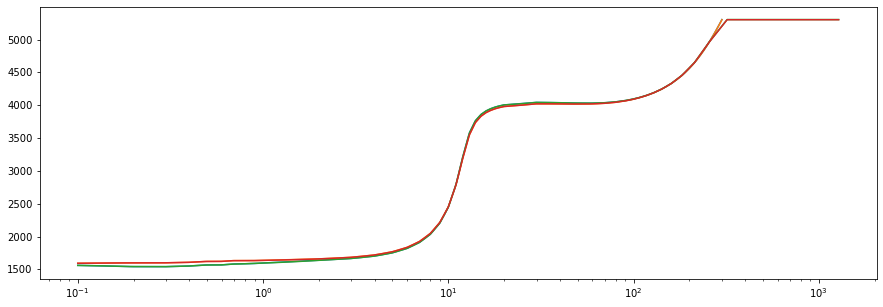

In [14]:
with open(f"{homepath}LNM/data/PHASE_VELOCITY_MODEL/"+"fur_wet_rayleigh.pkl",'rb') as f:
    vv_fur_wet = pickle.load(f)

vv_fur_interp = interp(1/ff, vv_fur_wet['periods'] , vv_fur_wet['vv_fur']) * 1000 ## convert to m/s
vv_wet_interp = interp(1/ff, vv_fur_wet['periods'] , vv_fur_wet['vv_wet']) * 1000 ## convert to m/s


plt.figure(figsize=(15,5))
plt.semilogx(vv_fur_wet['periods'] , vv_fur_wet['vv_fur'] * 1000)
plt.semilogx(vv_fur_wet['periods'] , vv_fur_wet['vv_wet'] * 1000)

plt.semilogx(1/ff, vv_fur_interp)
plt.semilogx(1/ff, vv_wet_interp)

# rfur = psds_fur[day.replace("-","")] / vv_fur_interp
# rwet = psds_wet[day.replace("-","")] / vv_wet_interp

## Create Automatic Plots

In [15]:
def __plot_rlnm_overview():
    
    import numpy as np
    
    font = 14

    fig, ax = plt.subplots(1,1,figsize=(15,8))

    ## add Frequency Axis
    g = lambda x: 1/x
    ax2 = ax.secondary_xaxis("top", functions=(g,g))
    ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
    ax2.set_xticklabels(1/periods, fontsize=11)
    
    ## single stations model
#     plt.plot(ssm_period, ssm_psd, color="purple", zorder=2, label="Single-Stations Model")
        

    ## PFO data
#     plt.plot(1/PFO_N['frequencies'], PFO_N_median_psd, color="darkgreen", zorder=2, label="PFO ADR-N")
#     plt.plot(1/PFO_E['frequencies'], PFO_E_median_psd, color="yellowgreen", zorder=2, label="PFO ADR-E")
#     plt.plot(1/PFO_Z['frequencies'], PFO_Z_median_psd, color="olive", zorder=2, label="PFO ADR-Z")
        
    ## romy data
    plt.plot(periods, romyz, color="orange", zorder=2, label="ROMY-Z")

    
    plt.plot(periods, rfur, color="darkred", zorder=2, label="FUR-R")
    plt.plot(periods, rwet, color="purple", zorder=2, label="WET-R")

    
    # romy data
#     plt.plot(romy_2022['frequencies'], romy_2022_median_psd, color="pink", zorder=2, label="ROMY-Z 2022")

    ## romy zne data
#     plt.plot(1/romy_zne['frequencies'], romy_zne['n_psd'], color="brown", zorder=2, label="ROMY-N")
#     plt.plot(1/romy_zne['frequencies'], romy_zne['e_psd'], color="chocolate", zorder=2, label="ROMY-E")

    ## rlas data
    plt.plot(periods[1:], rlasz[1:], color="blue", zorder=2, label="RLAS")

    ## theoretical rlnm
    plt.plot(rlnm_periods[1:], rlnm_psd[1:], color="black", zorder=2, lw=2, label="RLNM")


#     y_axis = 10**(output['bin_mids']/10)
#     x_axis = output['period']

    ## plotting

#     cmap = plt.cm.get_cmap('magma_r')
# #     cmap = plt.cm.get_cmap('gray_r')
#     cmap.set_under(color='white')

#     im = plt.pcolor(x_axis, y_axis, output['dist'].T, 
#                     cmap=cmap,
#                     vmin=1e-12, 
#                     alpha=0.99,
#                    )
    
    ## add medians 
#     medians = 10**(output['bins_medians']/10)
# #     plt.plot(output['period'], medians, color="black", zorder=2, lw=0.5, alpha=0.8, ls=":", label="median")
    
#     ## add minimas 
#     minimas = 10**(output['bins_minimum']/10)
#     plt.plot(output['period'], minimas, color="black", zorder=2, lw=1.5, alpha=0.8, label="RLNM")
    
    
#     ## add colorbar
#     caxes = fig.add_axes()
#     cb = plt.colorbar(im, cax=caxes, alpha=1.0)
#     cb.set_label("Propability Density", fontsize=font)
    
    
    plt.xscale("log")
    plt.yscale("log")

    plt.xlim(1, 300)

    ymin, ymax = 1e-26, 2e-18
    plt.ylim(ymin, ymax)
   
    plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
    plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)


    plt.grid(axis="both", which="both", ls="--", zorder=0)
    plt.legend()

    plt.xlabel("Period in seconds", fontsize=font)
    plt.ylabel(r"PSD in $\frac{rad^2}{s^2 Hz}$",fontsize=font)

    plt.text(4e1, 5e-18, date, fontsize=font, bbox=dict(facecolor='white', alpha=0.3))
    
    plt.show();
    return fig 

20190701


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


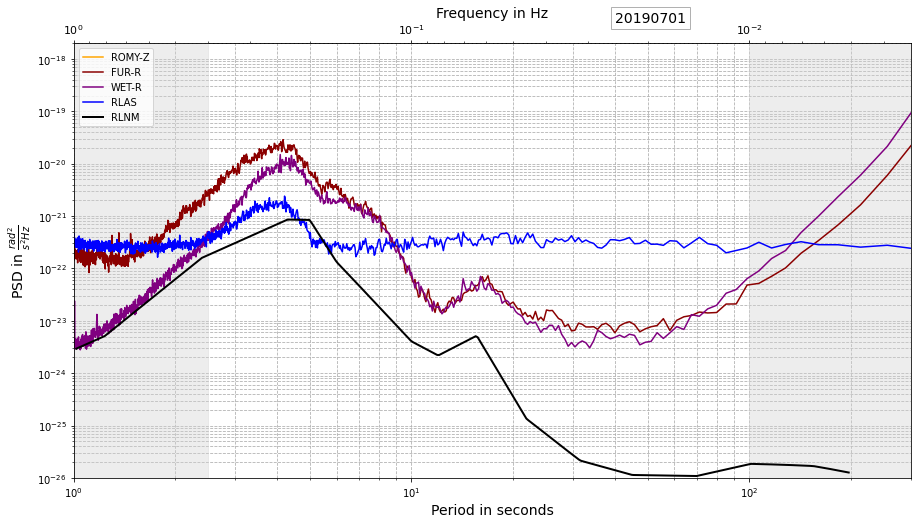

20190702


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


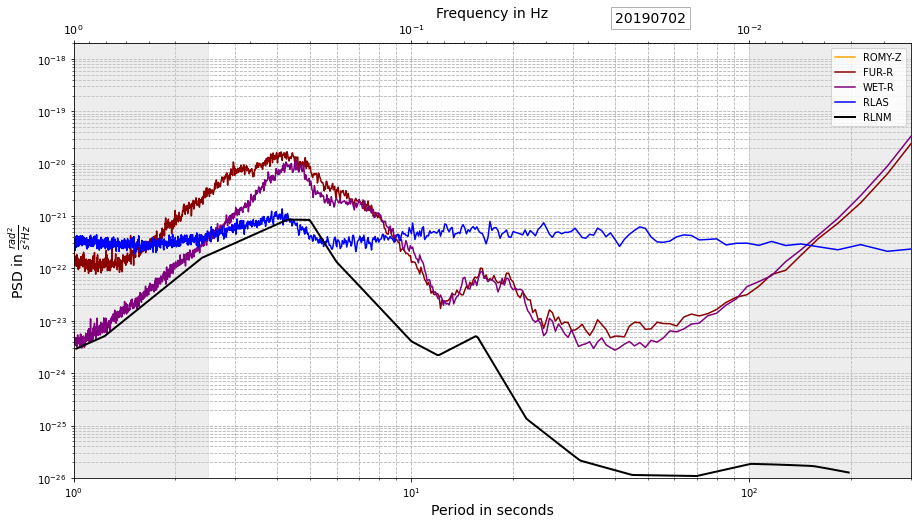

20190703


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


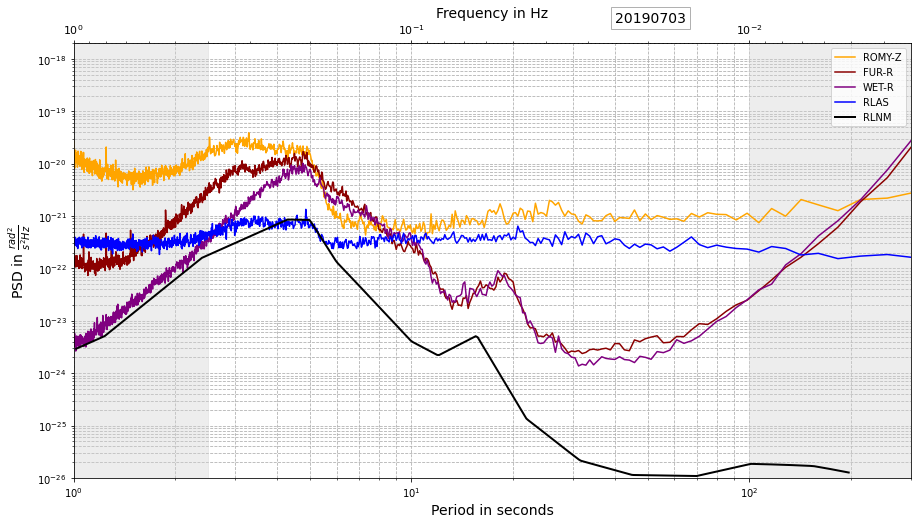

20190704


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


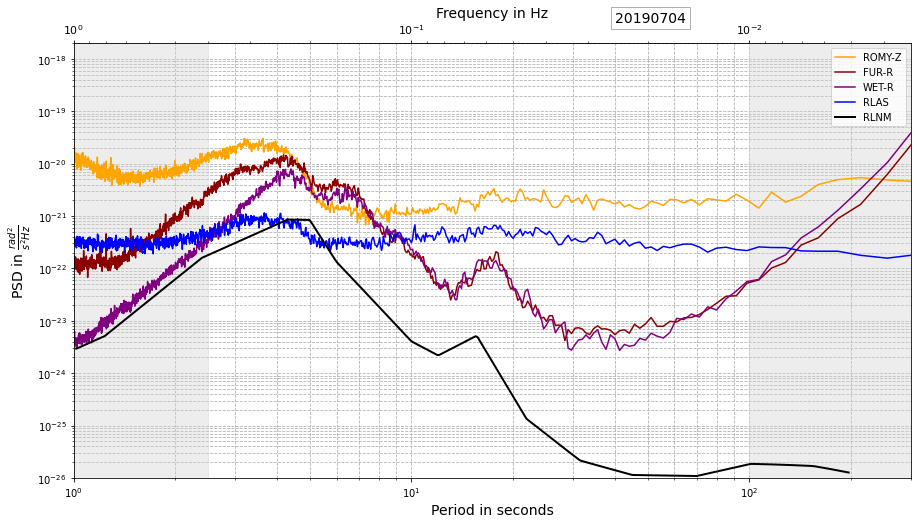

20190705


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


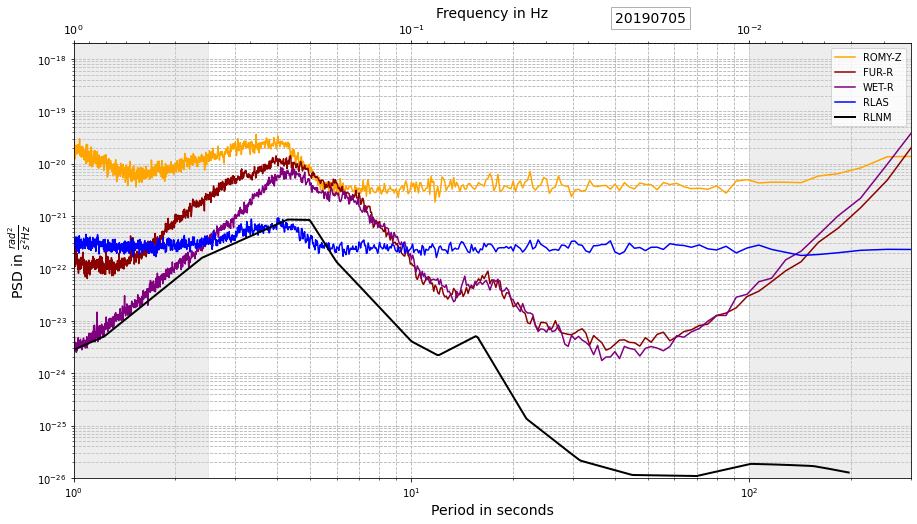

20190706


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


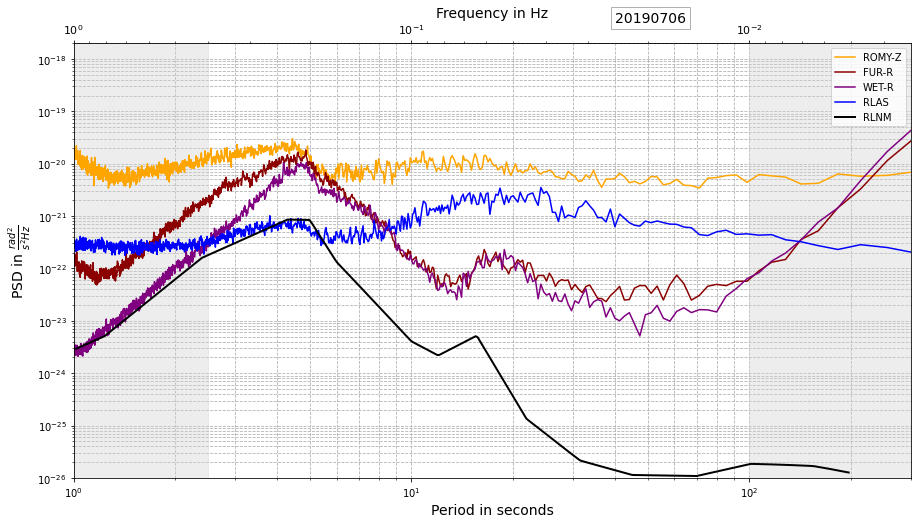

20190707


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


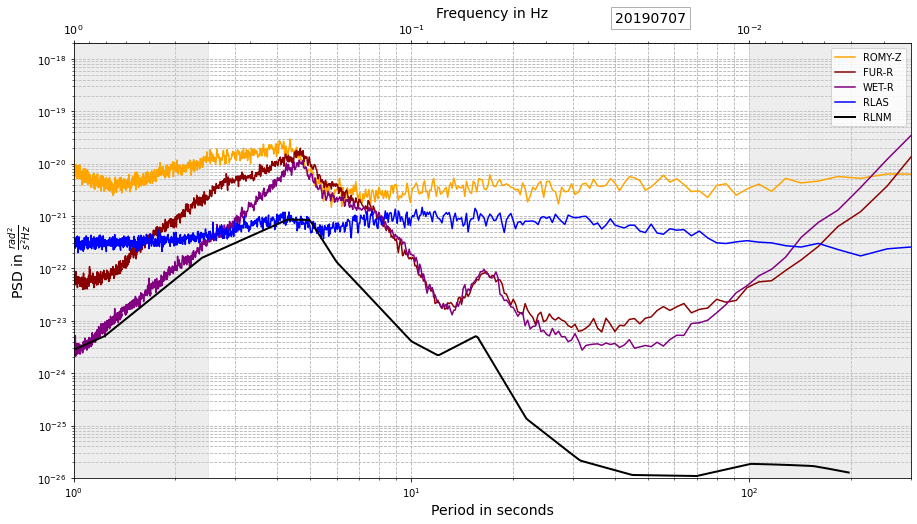

20190708


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


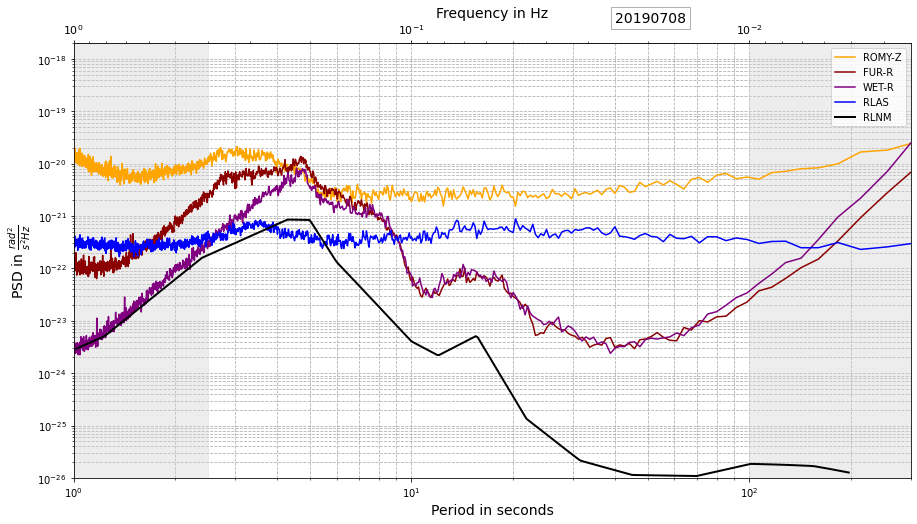

20190709


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


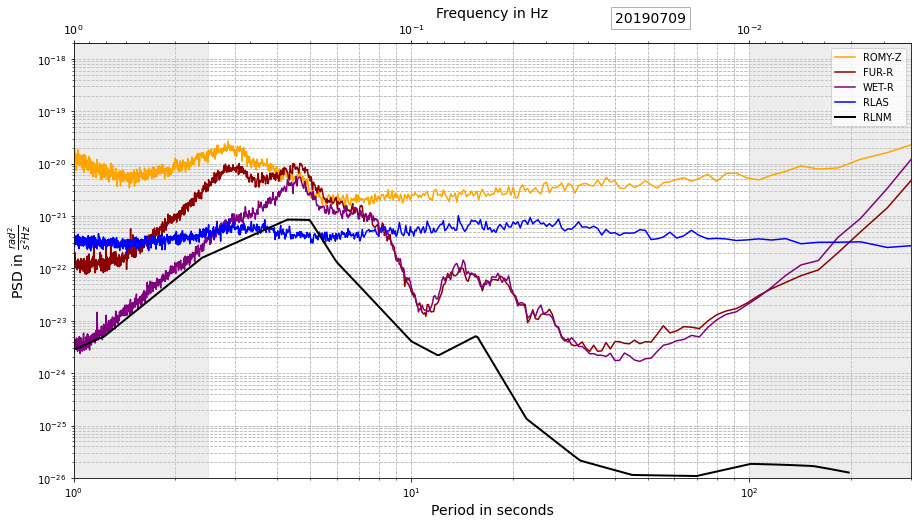

20190710


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


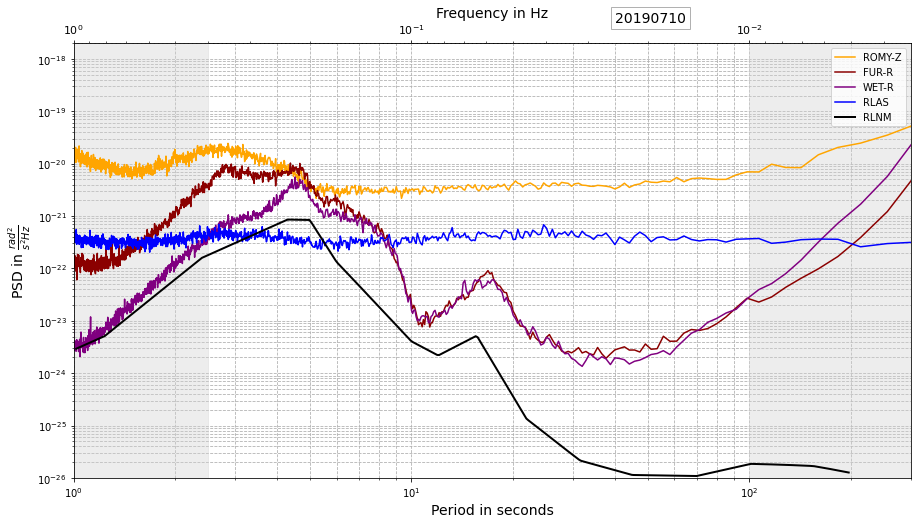

20190711


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


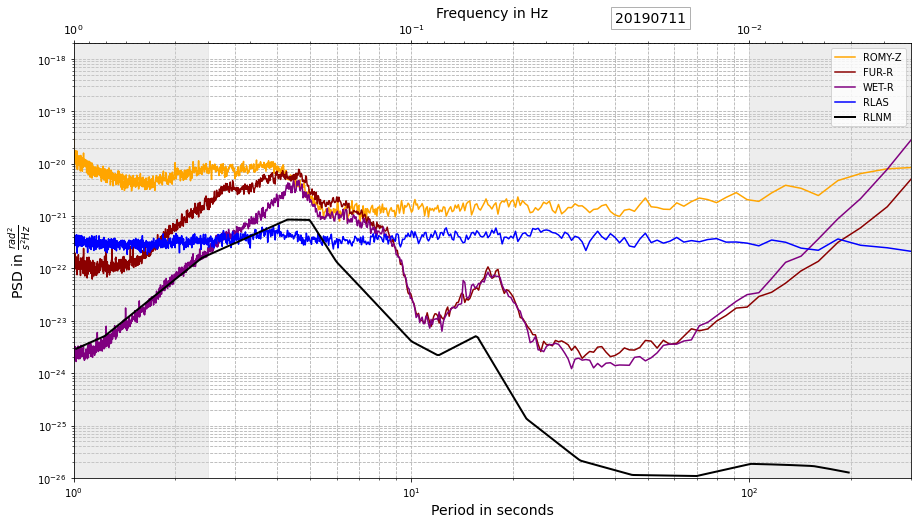

20190712


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


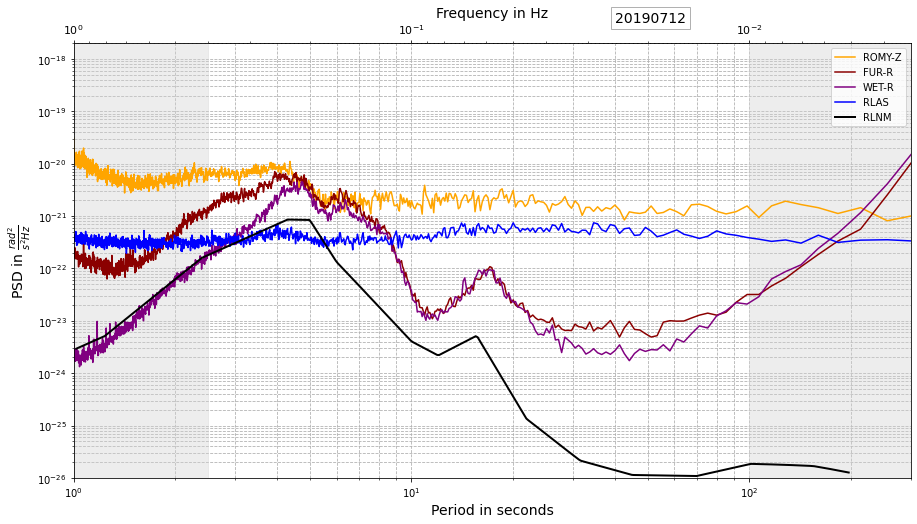

20190713


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


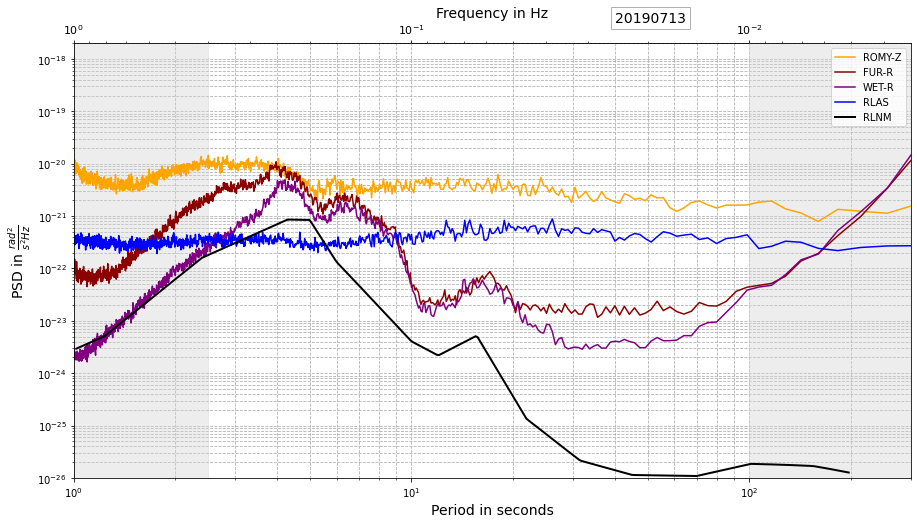

20190714


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


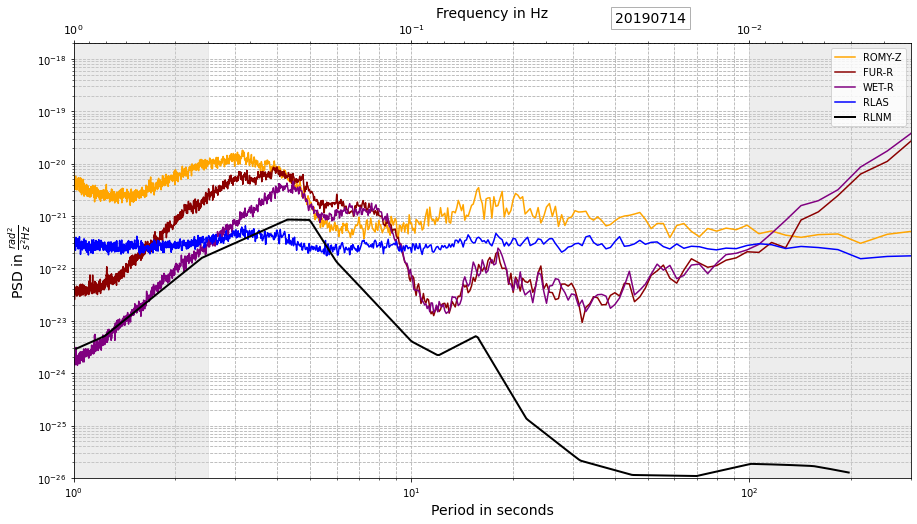

20190715


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


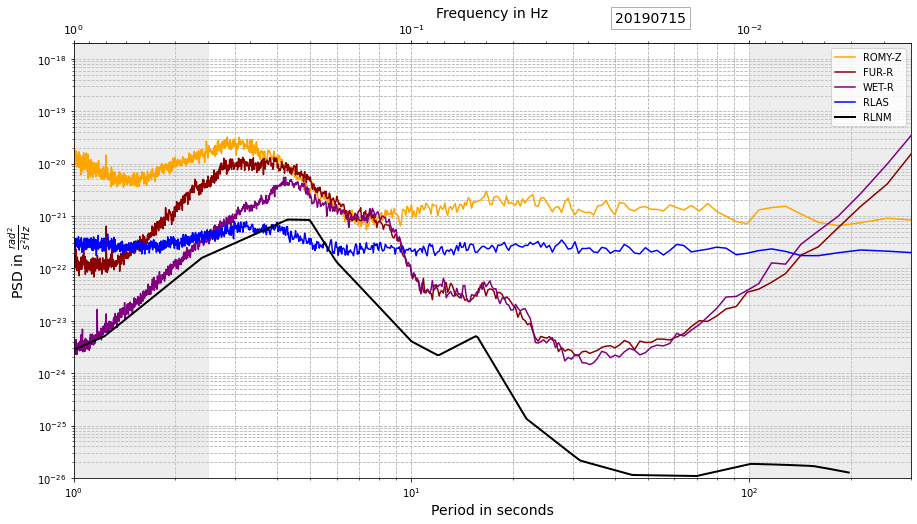

20190717


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


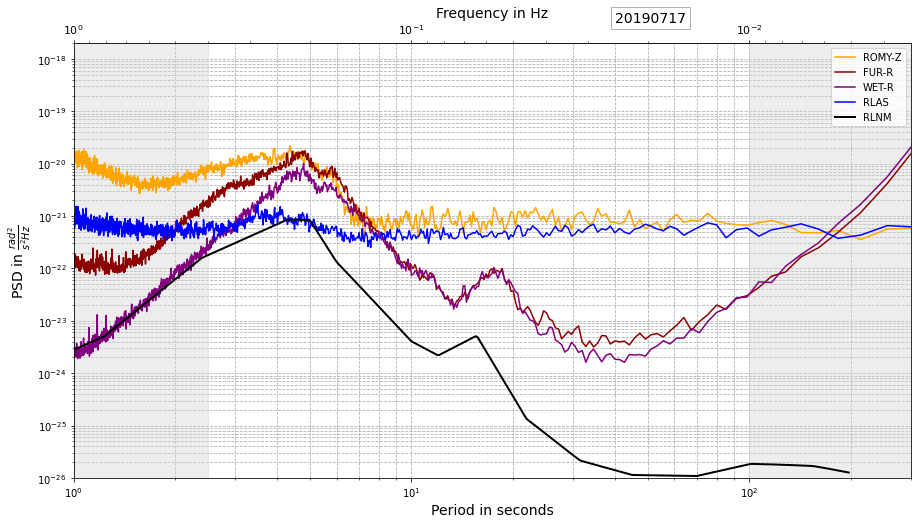

20190718


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


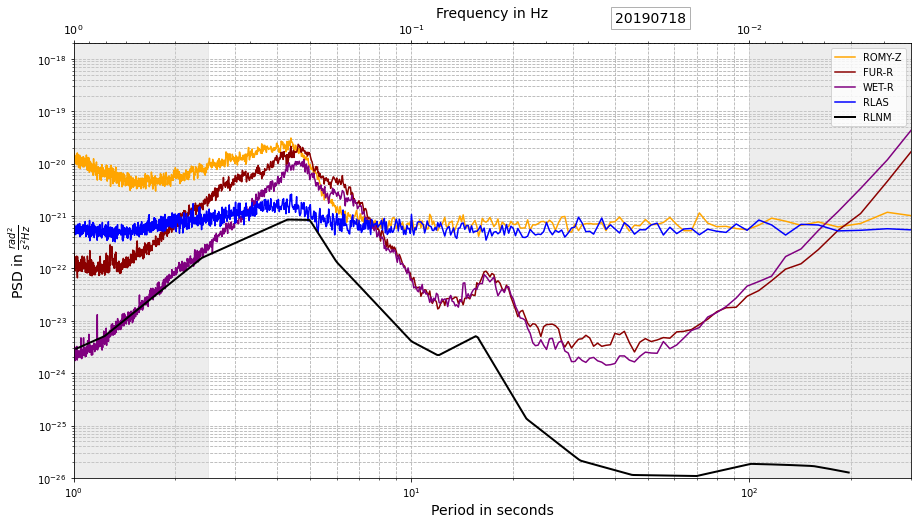

20190719


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


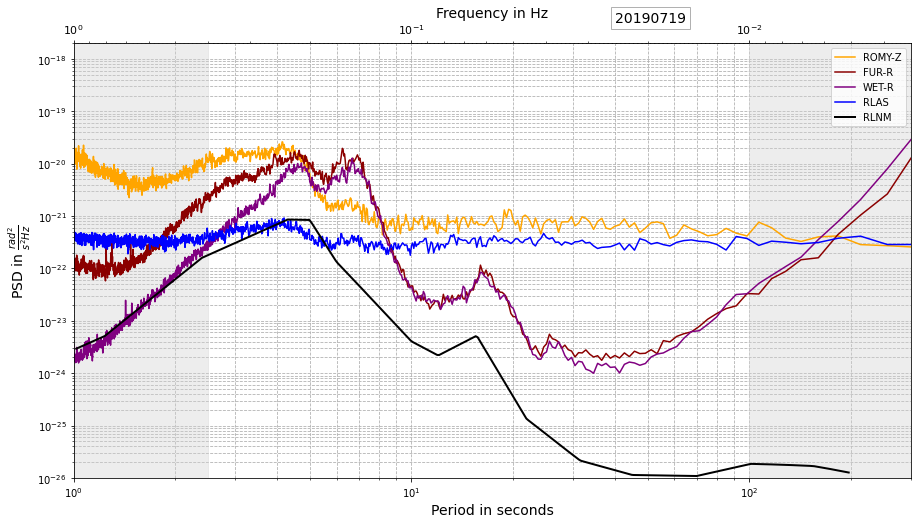

20190720


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


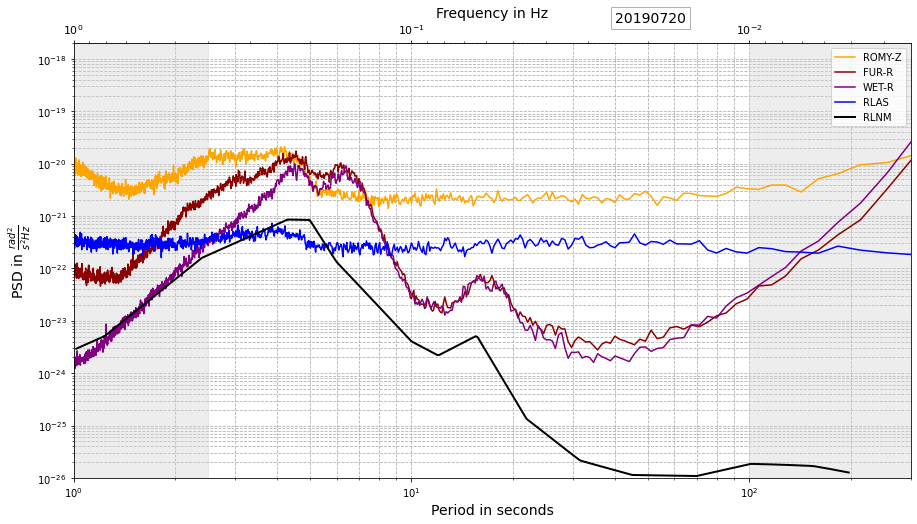

20190721


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


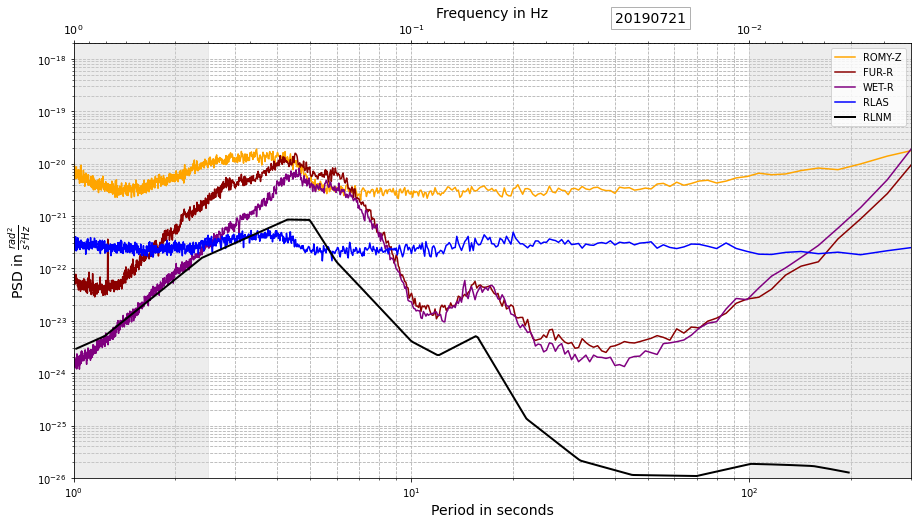

20190722


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


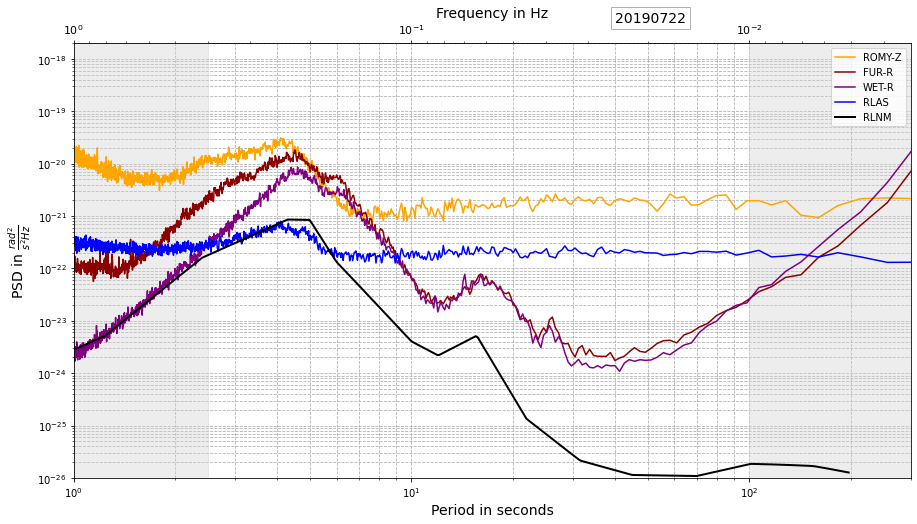

20190723


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


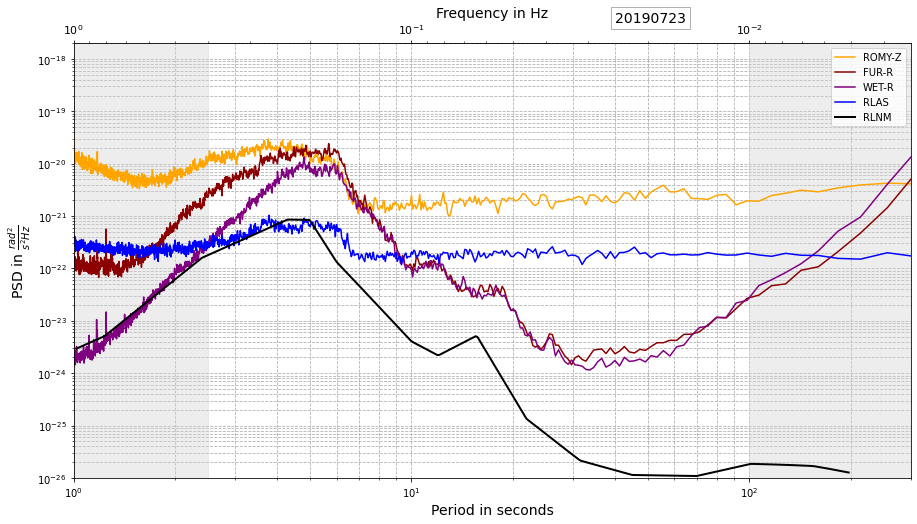

20190724


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


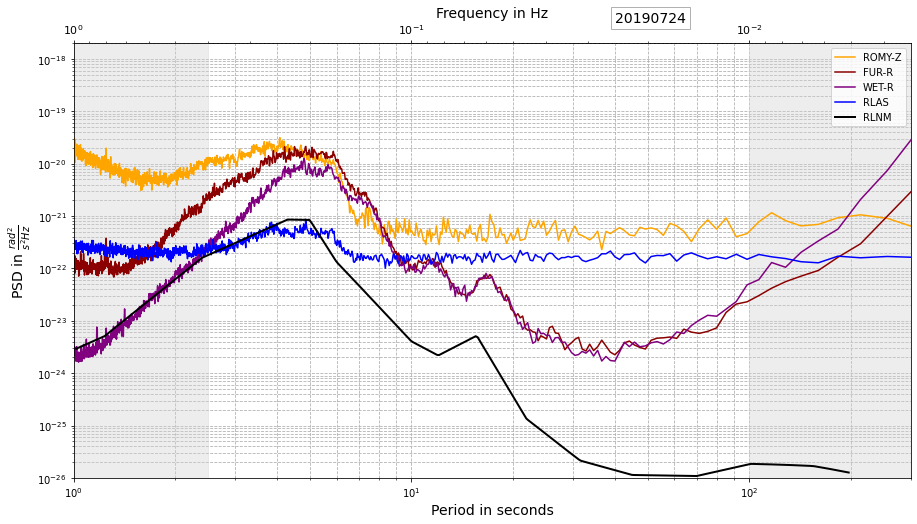

20190725


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


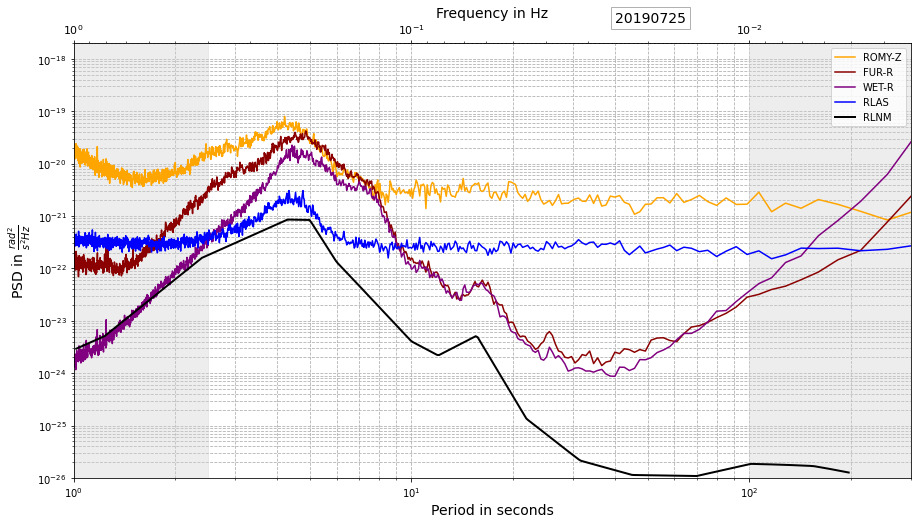

20190726


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


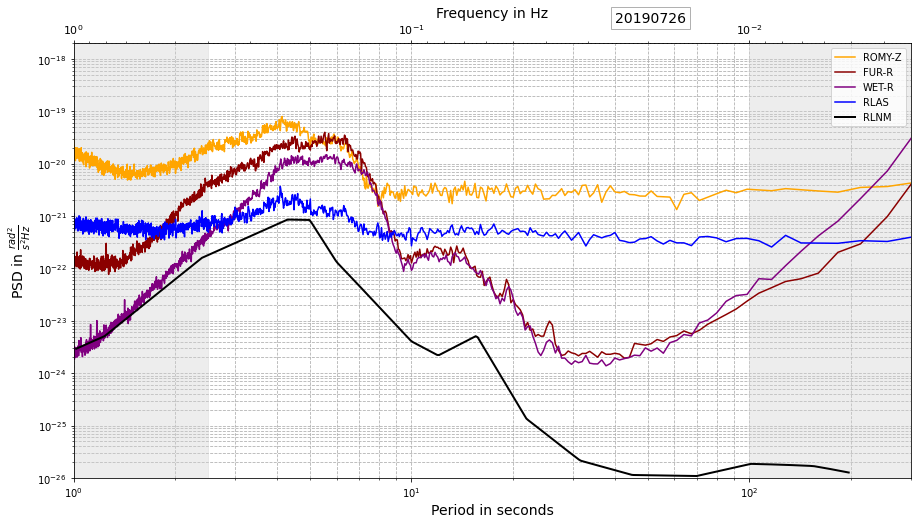

20190727


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


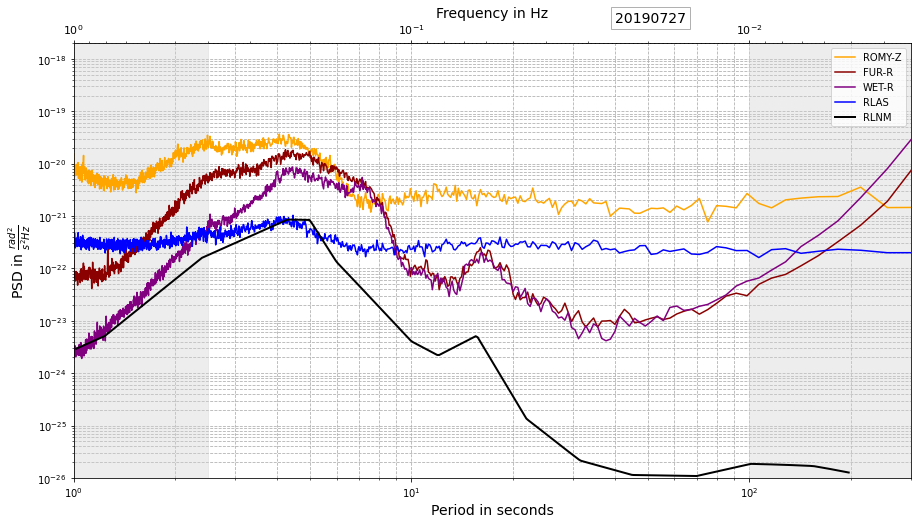

20190728


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


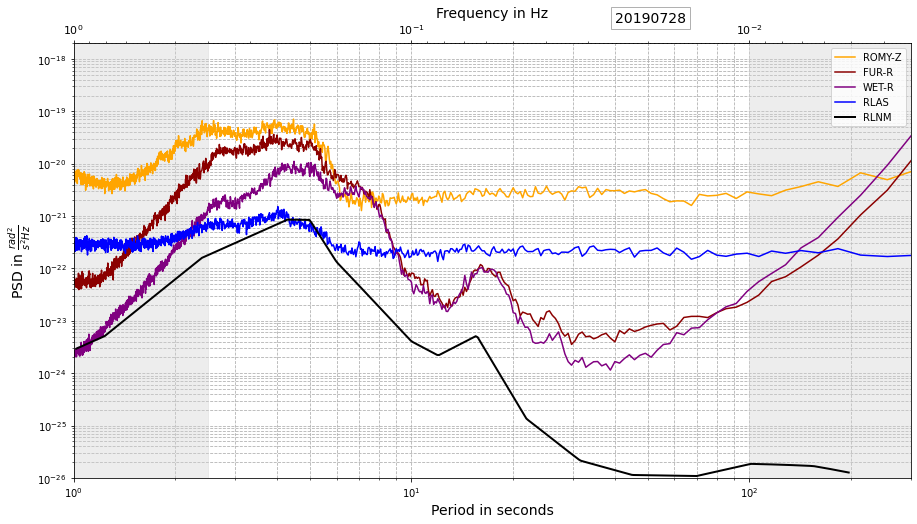

20190729


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


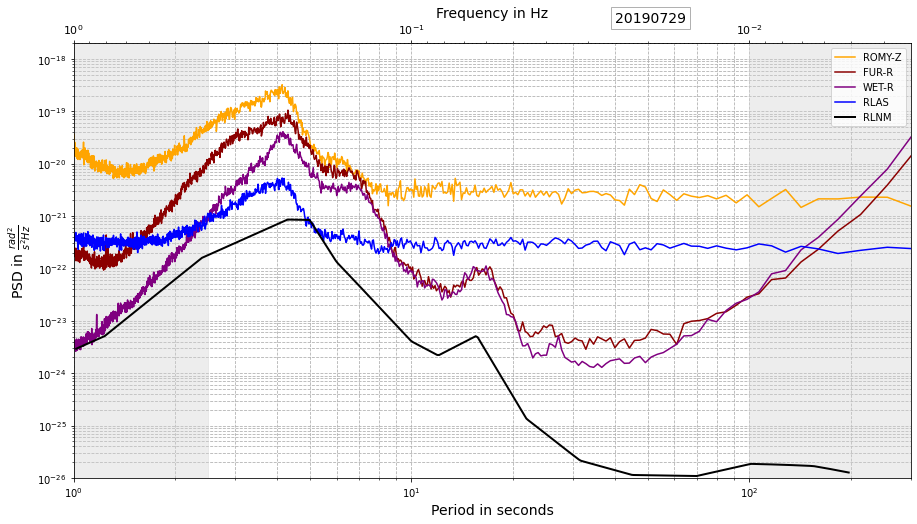

20190731


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


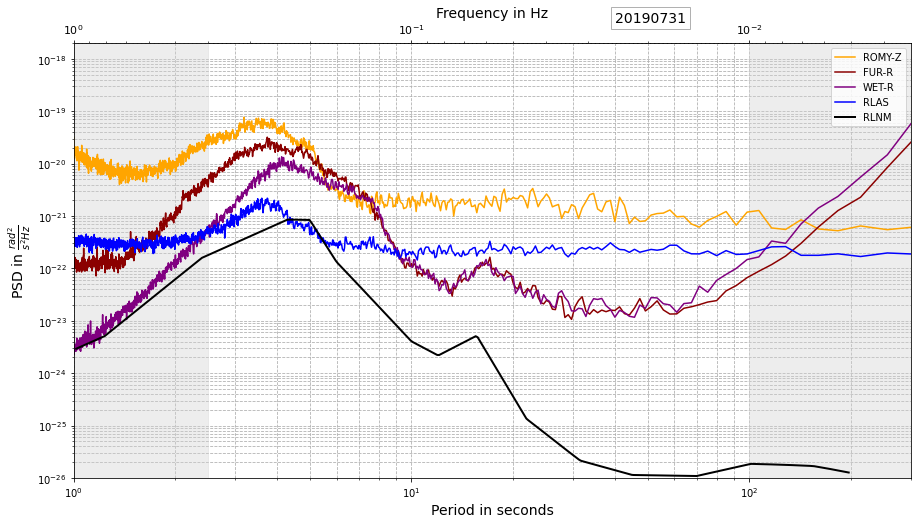

20190802


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


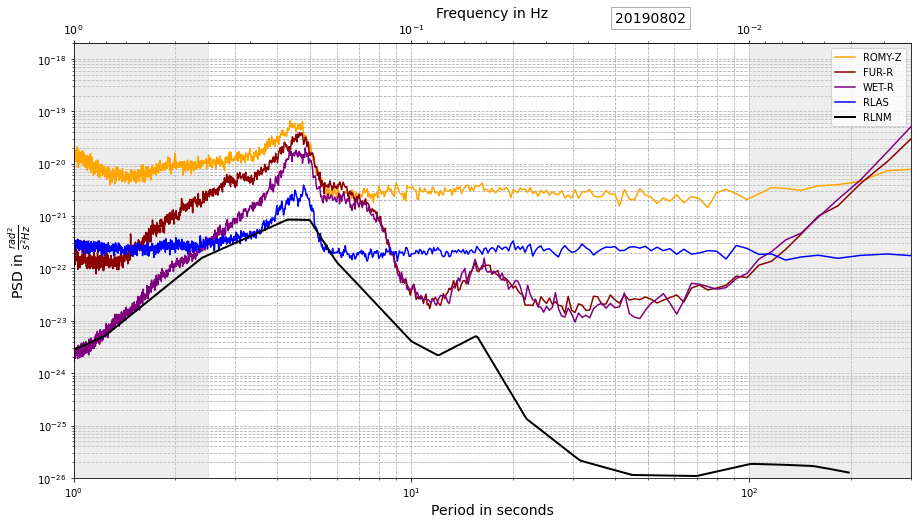

20190803


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


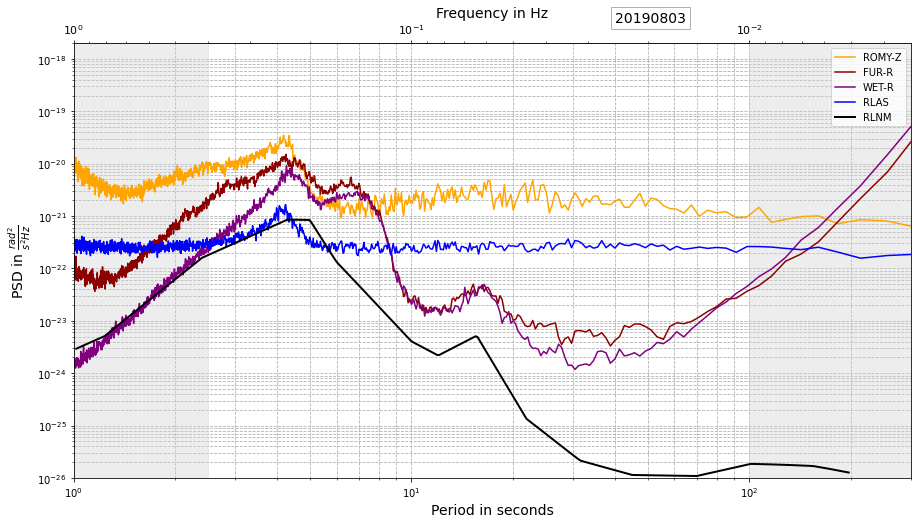

20190804


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


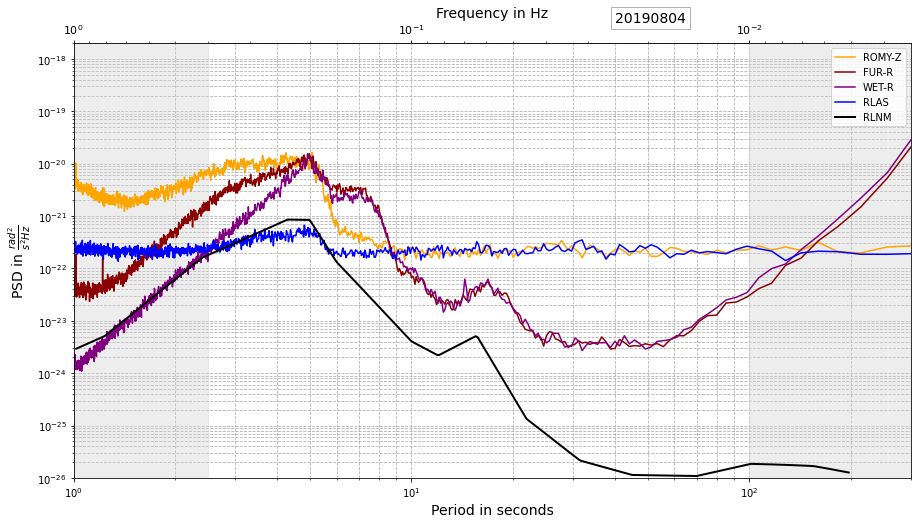

20190806


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


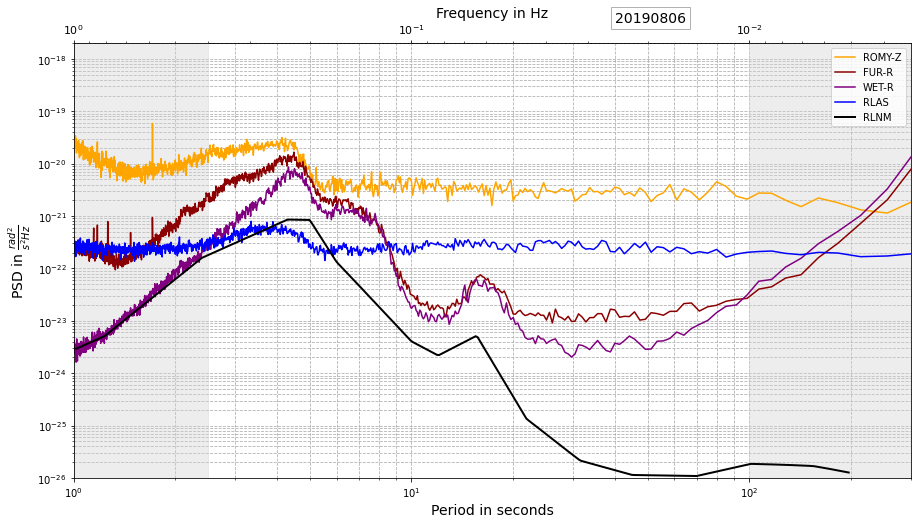

20190807


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


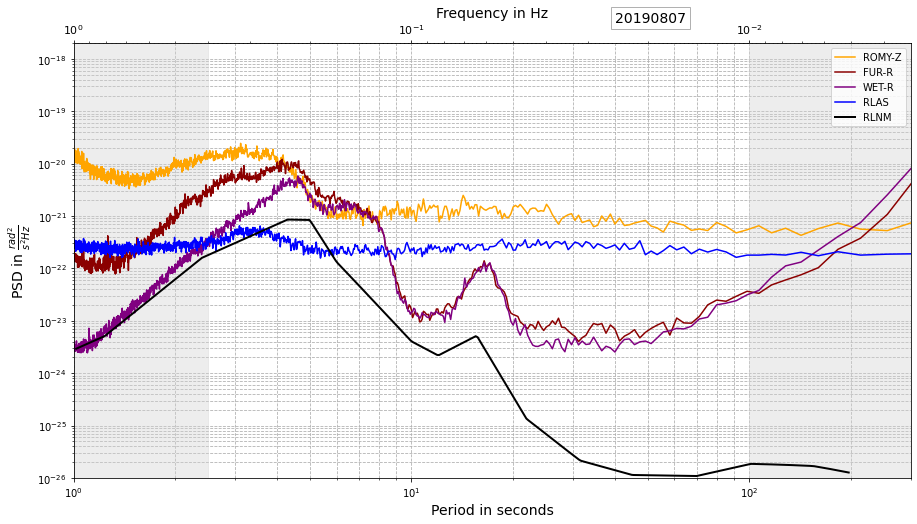

20190810


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


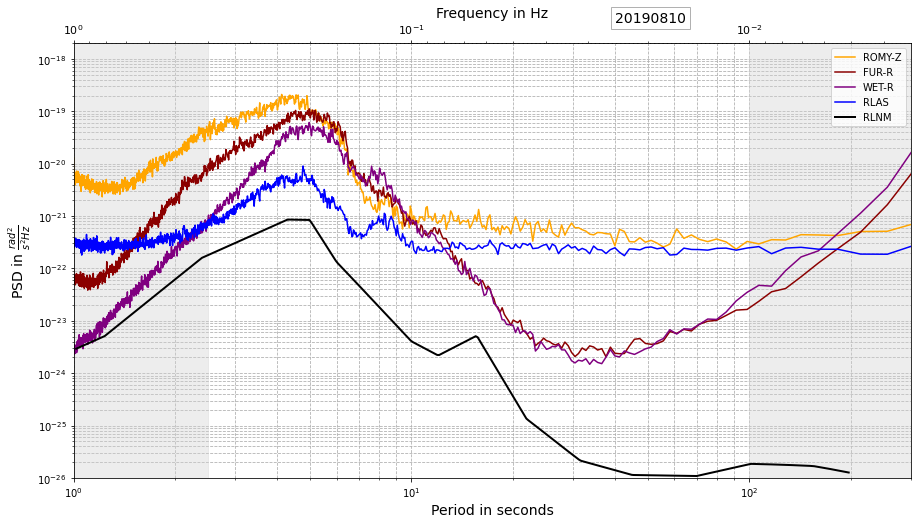

20190812


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


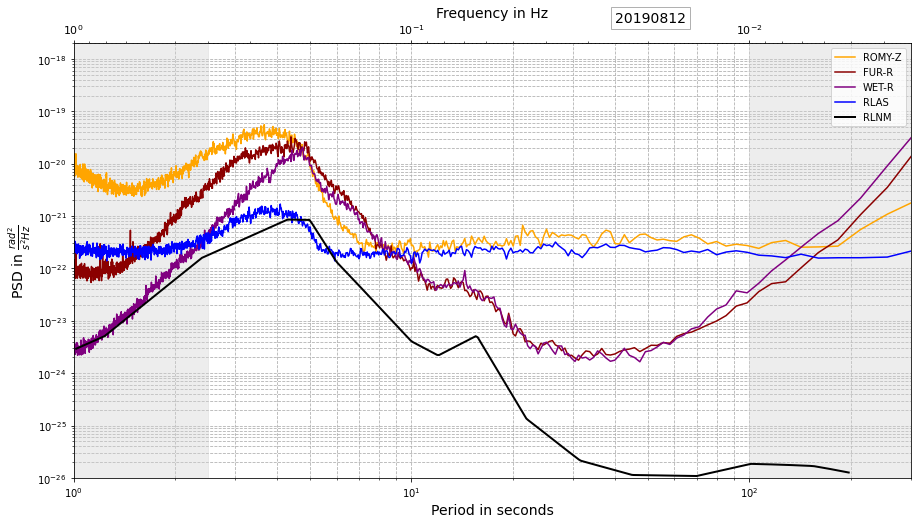

20190813


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


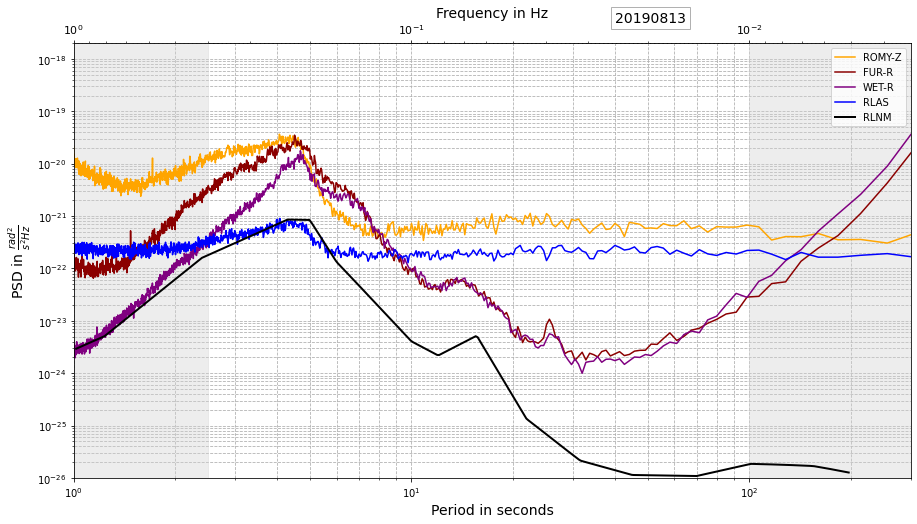

20190814


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


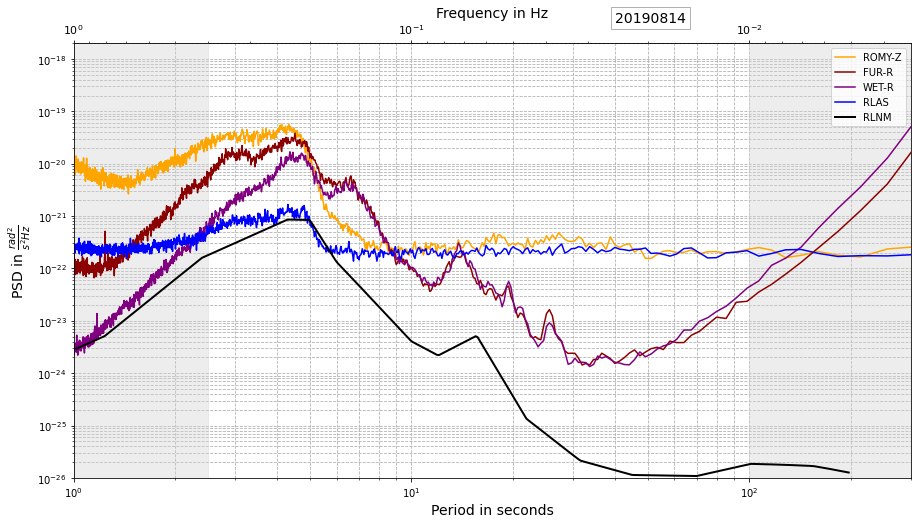

20190815


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


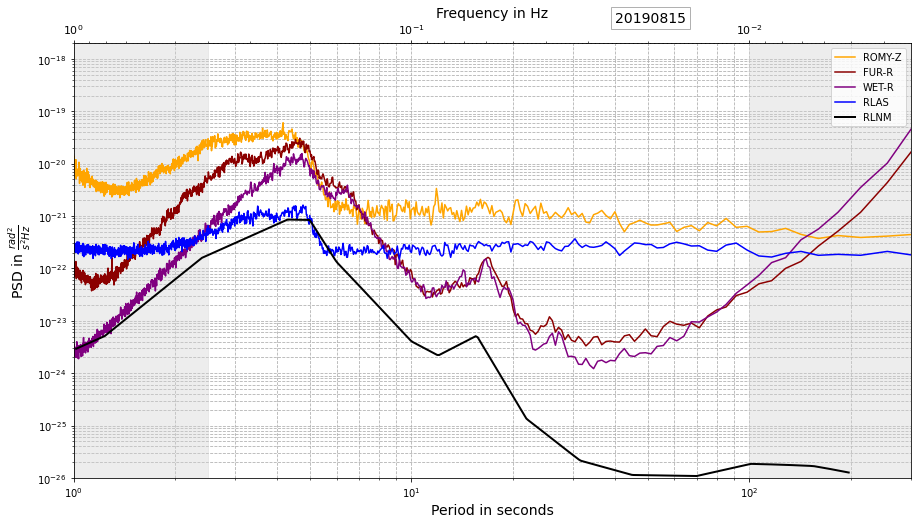

20190816


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


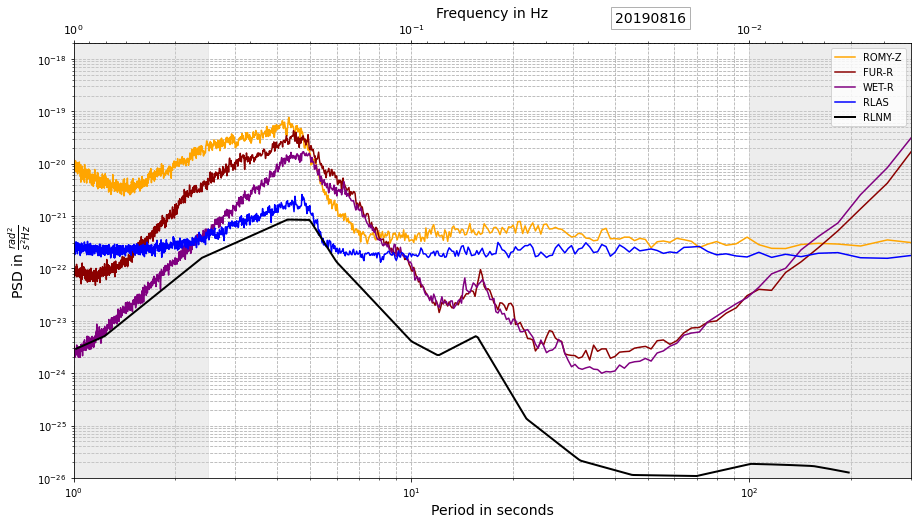

20190817


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


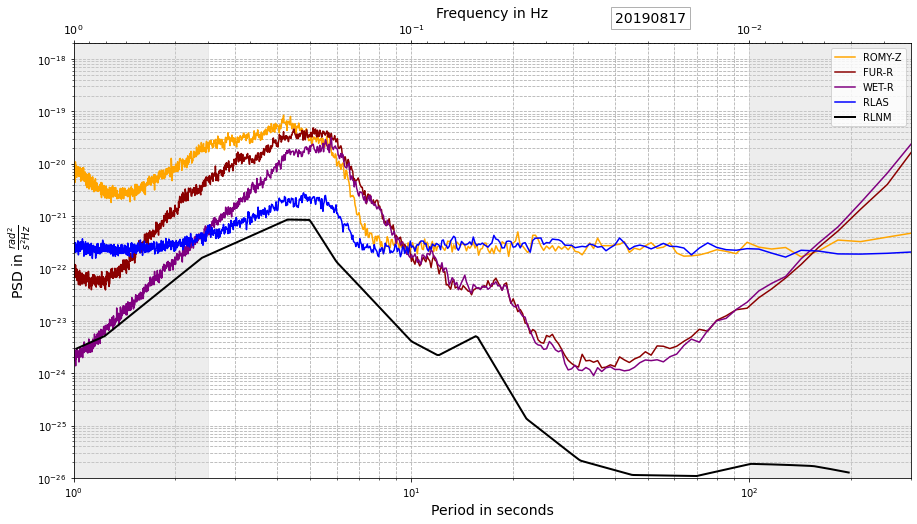

20190818


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


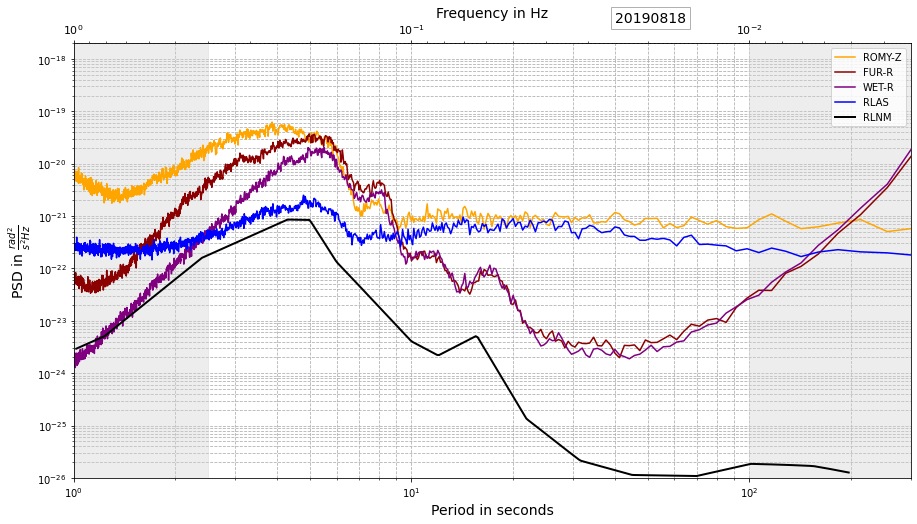

20190819


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


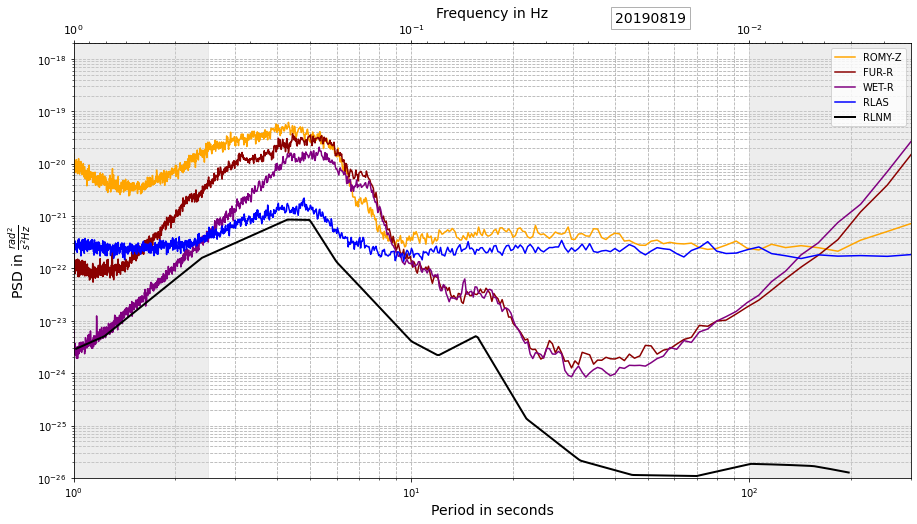

20190820


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


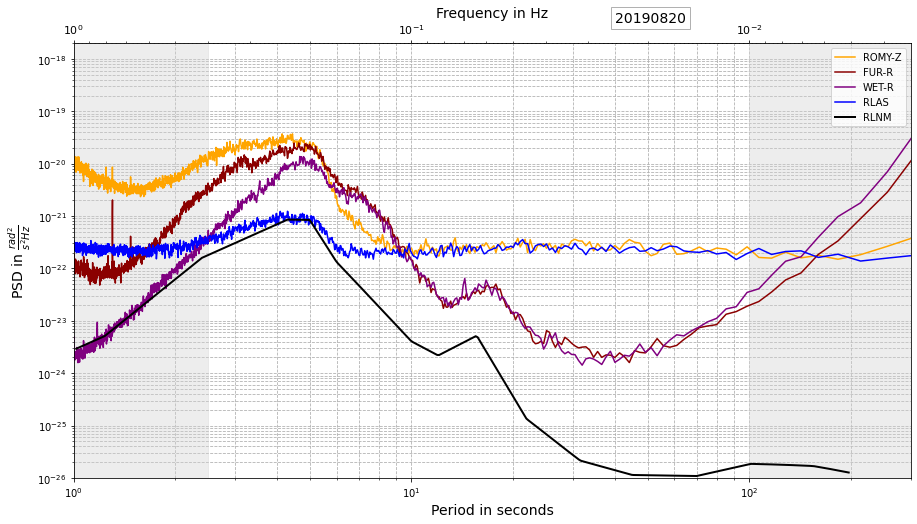

20190821


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


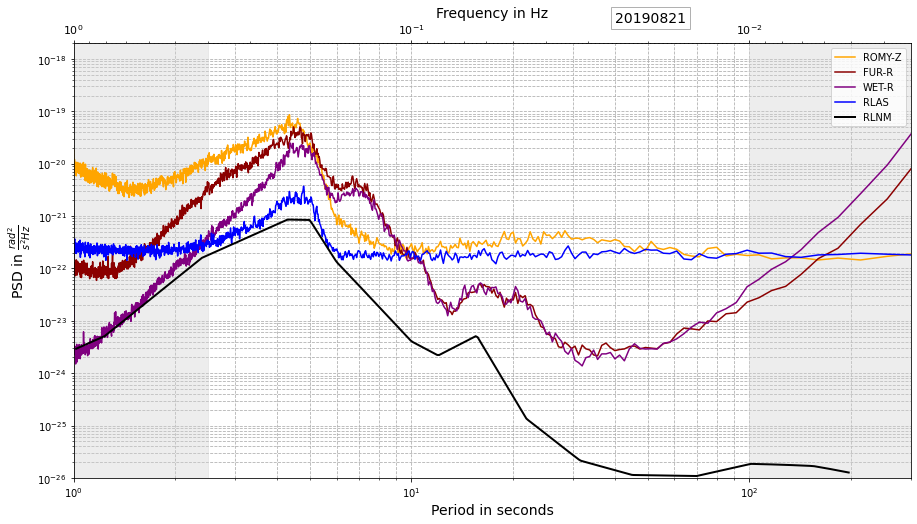

20190822


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


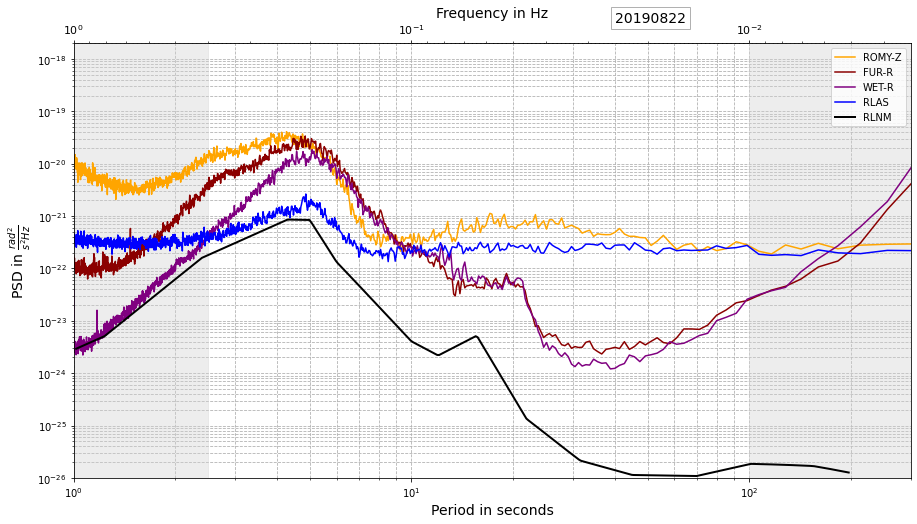

20190823


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


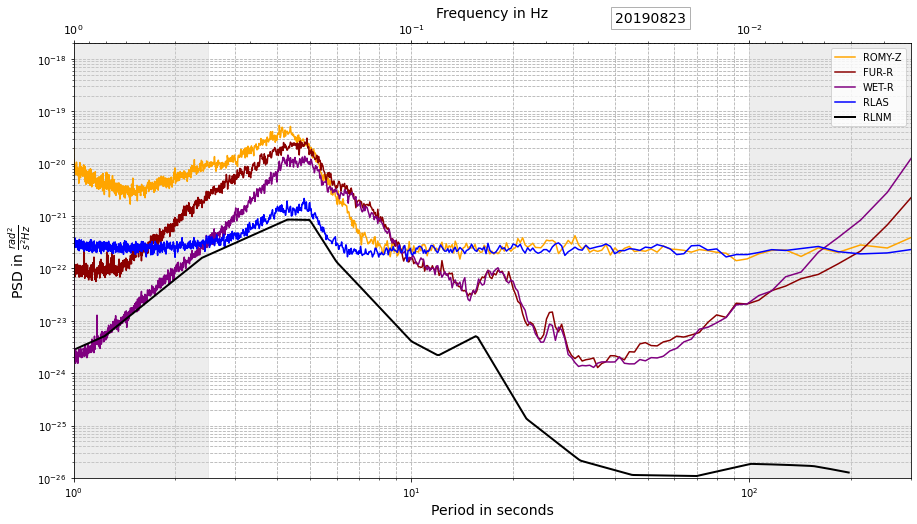

20190824


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


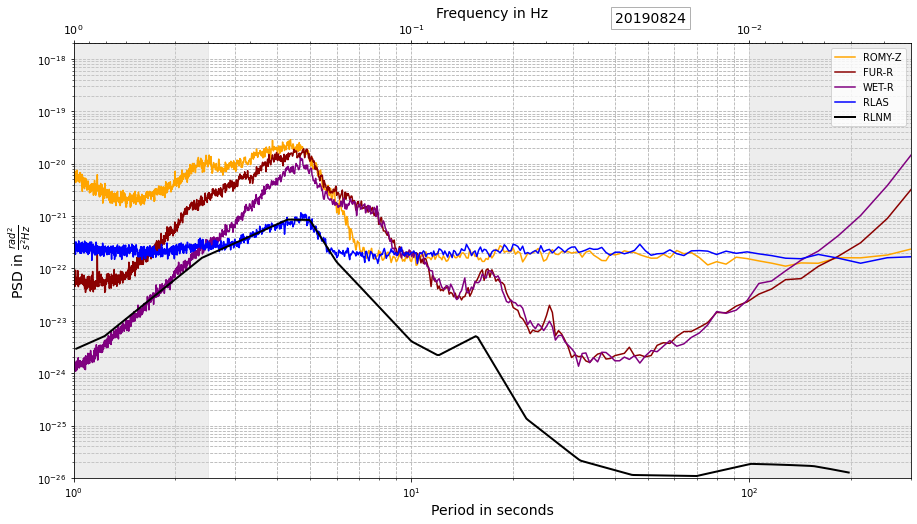

20190825


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


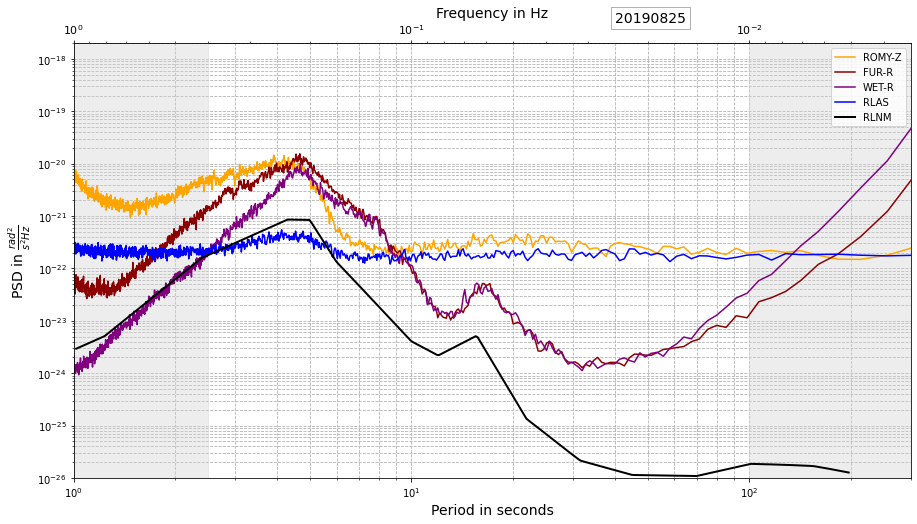

20190826


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


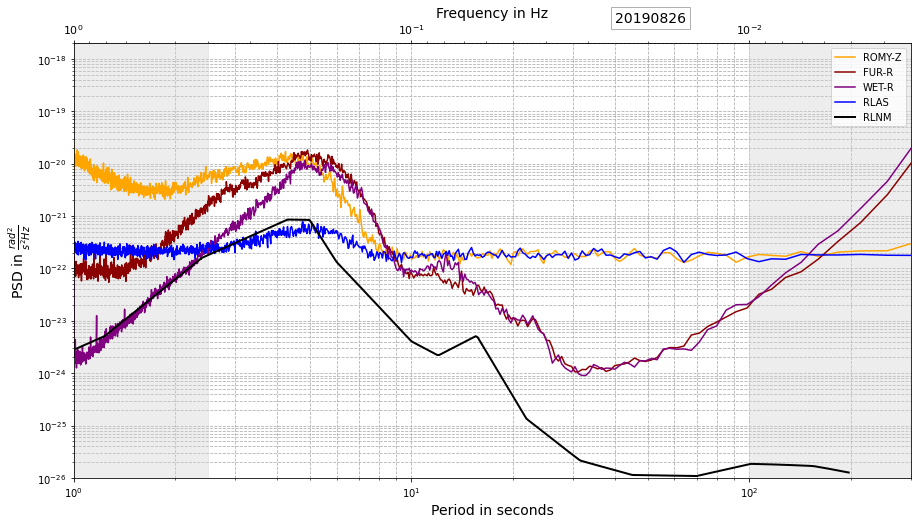

20190828


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


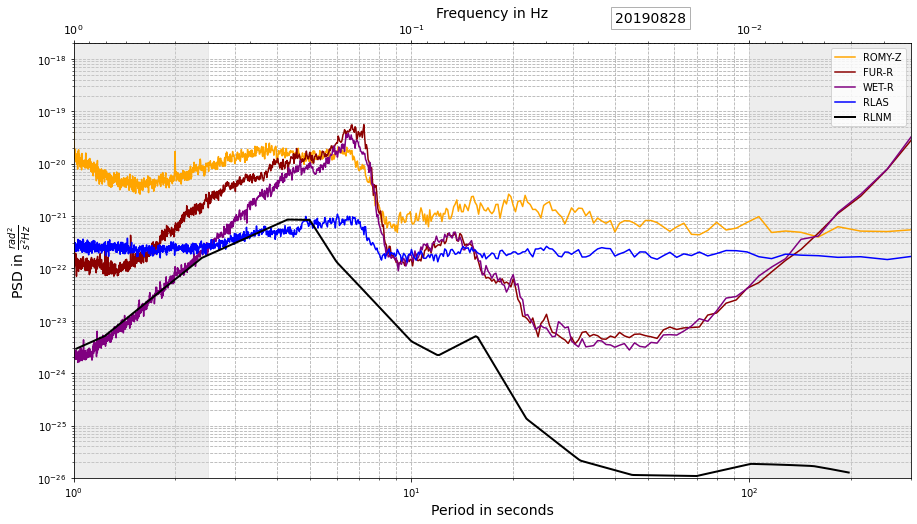

20190829


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


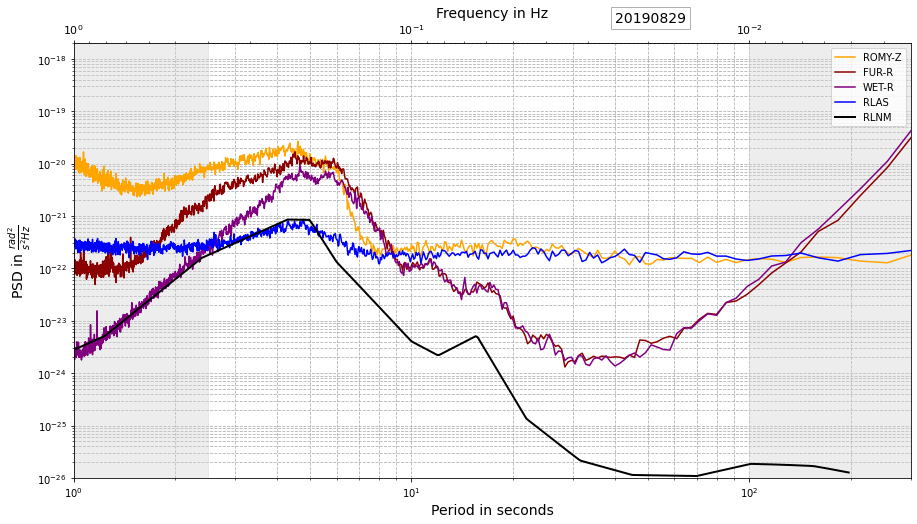

20190830


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


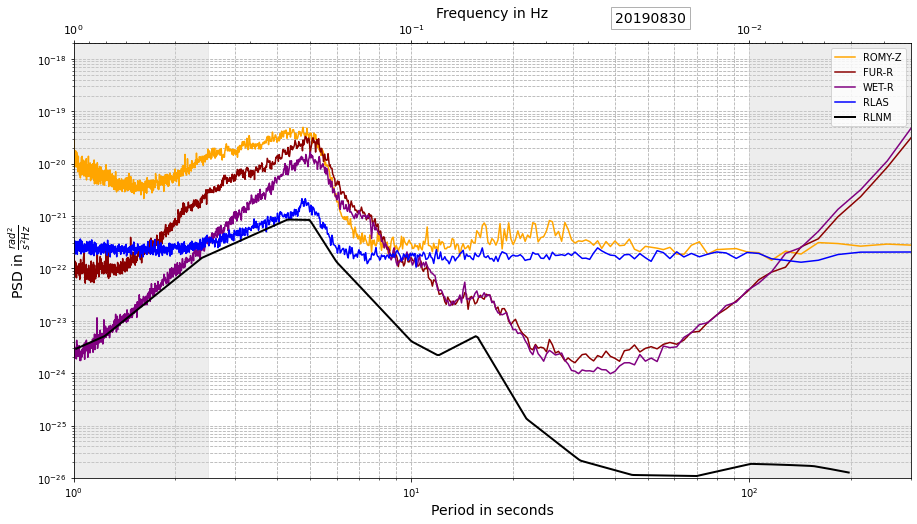

20190831


/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


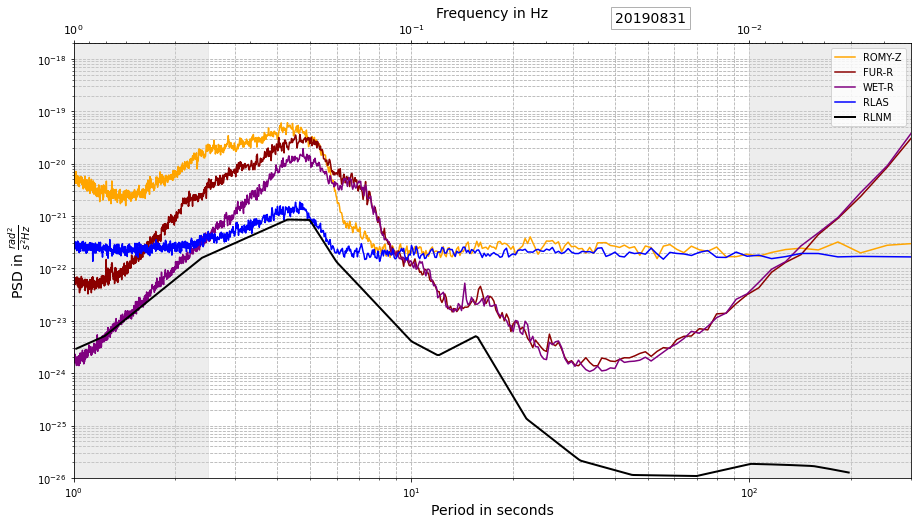

In [16]:
dates = date_range(start="2019-07-01", end="2019-08-31")
dates = [str(dd).split(" ")[0].replace("-","") for dd in dates]

periods = zeros(len(ff))
periods[:-1] = 1/ff[1:]

for date in dates: 
    
    if date in psds_rlas.columns and date in psds_romy.columns and date in psds_wet.columns and date in psds_fur.columns: 
        print(date)
        
        romyz = psds_romy[date]
        rlasz = psds_rlas[date]
        
        rfur = (sqrt(psds_fur[date]) / vv_fur_interp)**2
        rwet = (sqrt(psds_wet[date]) / vv_wet_interp)**2

        fig = __plot_rlnm_overview()
        
        fig.savefig(f"{out_figs}{date}.png")


## Plotting

In [17]:
# def __makeplot_colorlines(config, ff, psds, columns):

#     from numpy import isnan, median, mean, std, array
#     from scipy.stats import median_abs_deviation as mad

#     psds_median, psds_mean, psds_std, psds_mad = [],[],[],[]
#     for fcross in range(psds.shape[1]):
#         data = psds[:,fcross]
#         psds_median.append(median(data[~isnan(data)]))
#         psds_mean.append(mean(data[~isnan(data)]))
#         psds_std.append(std(data[~isnan(data)]))
#         psds_mad.append(mad(data[~isnan(data)]))

#     psds_minimal = __get_minimal_psd(array(psds))
# #     psds_minimum = __get_minimum_psd(array(psds), ff)


#     ff = 1/ff

#     ##____________________________

#     fig, ax = plt.subplots(1,1, figsize=(15,10), sharey=False, sharex=True)

#     font = 12

#     N = psds.shape[0]
#     colors = plt.cm.rainbow(linspace(0, 1, N))


#     for n, psd in enumerate(psds):
#         ax.loglog(ff, psd, color=colors[n], alpha=0.7)


#     ## add scatter for colorbar object only
#     for n, psd in enumerate(psds):
#         p2 = ax.scatter(ff[0], psd[0], s=0., c=n, cmap='rainbow', vmin=0, vmax=N)


#     ax.loglog(ff, psds_median, 'black', zorder=3, alpha=0.9)
# #     ax.loglog(ff, psds_mean, 'black', zorder=3, alpha=0.9)


#     ax.loglog(ff, psds_minimal, 'grey', zorder=2, alpha=1.0)
# #     ax.loglog(ff, psds_minimum, 'k', zorder=2, alpha=0.8)


# #     ax.set_title("Minimal PSD", fontsize=font)
# #     ax.set_title("Minimum PSD", fontsize=font)

#     ax.set_xlabel("Period (s)", fontsize=font)

#     ax.set_ylabel(r"PSD (rad$^2$/s$^2$/$Hz)$", fontsize=font)

#     ax.grid(True, which="both", ls="-", alpha=0.5)

#     ax.set_xlim(min(ff), max(ff))
# #     ax.set_xlim(10**log10(config['frequency_limits'][0]), 10**log10(config['frequency_limits'][1]))

#     ## set colorbar at bottom
#     cbar = fig.colorbar(p2, orientation='horizontal', ax=ax, aspect=50)

#     ## redefine ticks of colorbar
# #     new_ticks=[]
# #     for n, t in enumerate(cbar.get_ticks()):
# #         print(n)
# #         new_ticks.append(columns[int(t)])
# #     print(new_ticks)
# #     cbar.ax.set_xticklabels(columns)


#     plt.show();

#     out = DataFrame()
#     out['frequencies'] = ff
#     out['psds_minimal'] = array(psds_minimal)
#     out['psds_median'] = array(psds_median)
#     out['psds_mean'] = array(psds_mean)
#     out['psds_std'] = array(psds_std)
#     out['psds_mad'] = array(psds_mad)


#     return fig, out

In [18]:
# fig, out = __makeplot_colorlines(config, ff, psds, columns)